In [1]:
from matplotlib import pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
img_count=len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [7]:
sunflowers=list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

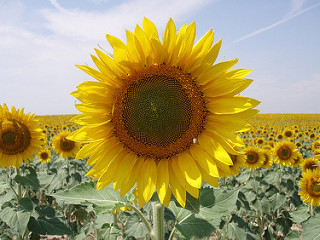

In [8]:
PIL.Image.open(sunflowers[1])

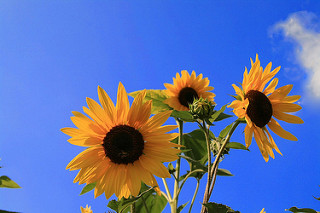

In [9]:
PIL.Image.open(str(sunflowers[10]))

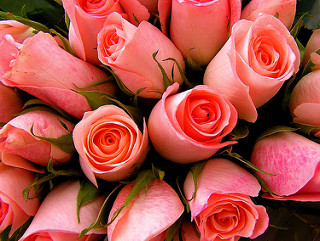

In [10]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(roses[8])

In [11]:
flowers_image_dict={
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*'))
}

In [12]:
flowers_labels_dict={
    'sunflowers': 0,
    'roses': 1,
    'tulips': 2,
    'daisy': 3,
    'dandelion': 4,
}

In [13]:
flowers_image_dict['tulips'][:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [14]:
flowers_image_dict['tulips'][5]

WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg')

In [15]:
str(flowers_image_dict['tulips'][5])

'datasets\\flower_photos\\tulips\\10164073235_f29931d91e.jpg'

In [16]:
import cv2
img=cv2.imread(str(flowers_image_dict['roses'][8]))

In [17]:
img.shape

(241, 320, 3)

In [18]:
cv2.resize(img,(160,160)).shape

(160, 160, 3)

In [19]:
X,y=[],[]

for flower_name,images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(160,160))
        X.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train=X_train/255
X_test=X_test/255

In [23]:
X_train.shape

(2936, 160, 160, 3)

In [24]:
model=Sequential([
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(34,3,activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16,3,activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax') 
    
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=15)

Epoch 1/15
92/92 [==============================] - 159s 2s/step - loss: 1.3162 - accuracy: 0.4152
Epoch 2/15
92/92 [==============================] - 150s 2s/step - loss: 1.0788 - accuracy: 0.5616
Epoch 3/15
92/92 [==============================] - 152s 2s/step - loss: 0.9706 - accuracy: 0.6158
Epoch 4/15
92/92 [==============================] - 155s 2s/step - loss: 0.8235 - accuracy: 0.6778
Epoch 5/15
92/92 [==============================] - 158s 2s/step - loss: 0.7088 - accuracy: 0.7377
Epoch 6/15
92/92 [==============================] - 158s 2s/step - loss: 0.5731 - accuracy: 0.7933
Epoch 7/15
92/92 [==============================] - 160s 2s/step - loss: 0.4225 - accuracy: 0.8467
Epoch 8/15
92/92 [==============================] - 157s 2s/step - loss: 0.3089 - accuracy: 0.8948
Epoch 9/15
92/92 [==============================] - 159s 2s/step - loss: 0.1810 - accuracy: 0.9404
Epoch 10/15
92/92 [==============================] - 159s 2s/step - loss: 0.1130 - accuracy: 0.9629
Epoch 11/

In [25]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 12s 523ms/step - loss: 2.2039 - accuracy: 0.6540


[2.2038731575012207, 0.6539509296417236]

In [26]:
predictions=model.predict(X_test)
predictions

array([[1.7980550e-05, 7.1900254e-03, 9.8450863e-01, 7.6461192e-03,
        6.3712429e-04],
       [9.9618018e-01, 9.6772644e-13, 7.4914487e-06, 3.7337004e-17,
        3.8124153e-03],
       [6.1096585e-01, 1.3467828e-02, 3.7433729e-01, 6.9251496e-07,
        1.2282962e-03],
       ...,
       [3.8186988e-01, 1.0640662e-07, 3.9883754e-01, 2.1928890e-01,
        3.5551216e-06],
       [1.3573175e-07, 9.5562607e-01, 4.4272296e-02, 1.0057140e-04,
        9.1629914e-07],
       [1.0738090e-16, 9.9999225e-01, 7.6839506e-06, 9.1121237e-08,
        3.1250790e-11]], dtype=float32)

In [27]:
layers.experimental.preprocessing.RandomRotation(0.3)

In [28]:
predictions[0]

array([1.7980550e-05, 7.1900254e-03, 9.8450863e-01, 7.6461192e-03,
       6.3712429e-04], dtype=float32)

In [29]:
np.argmax(predictions[0])

2

In [30]:
y_test[0]

1

In [31]:
from tensorflow.keras import preprocessing, experimental

In [33]:
# Data Augumentation
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

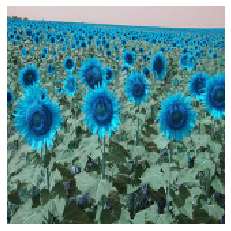

In [41]:
plt.axis('off')
plt.imshow(X[2])

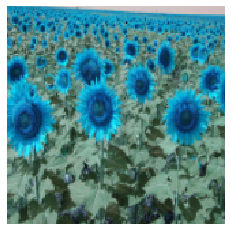

In [43]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [48]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=10)    

Epoch 1/10
92/92 [==============================] - 95s 1s/step - loss: 1.4489 - accuracy: 0.3505
Epoch 2/10
92/92 [==============================] - 100s 1s/step - loss: 1.1054 - accuracy: 0.5422
Epoch 3/10
92/92 [==============================] - 93s 1s/step - loss: 1.0024 - accuracy: 0.6059
Epoch 4/10
92/92 [==============================] - 109s 1s/step - loss: 0.9220 - accuracy: 0.6393
Epoch 5/10
92/92 [==============================] - 98s 1s/step - loss: 0.8595 - accuracy: 0.6662
Epoch 6/10
92/92 [==============================] - 112s 1s/step - loss: 0.8048 - accuracy: 0.6904
Epoch 7/10
92/92 [==============================] - 95s 1s/step - loss: 0.7561 - accuracy: 0.7044
Epoch 8/10
92/92 [==============================] - 95s 1s/step - loss: 0.7303 - accuracy: 0.7207
Epoch 9/10
92/92 [==============================] - 63s 688ms/step - loss: 0.7039 - accuracy: 0.7221
Epoch 10/10
92/92 [==============================] - 55s 597ms/step - loss: 0.6846 - accuracy: 0.7394


In [49]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 4s 162ms/step - loss: 0.8841 - accuracy: 0.6839


[0.8840841054916382, 0.6839237213134766]